Import Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [20]:
df = pd.read_csv('SVMtrain.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [22]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [23]:
pclass_names = {
    1: "First class",
    2: "Second class",
    3: "Third class"
}

df['Pclass name'] = df['Pclass'].map(pclass_names)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass name
0,1,0,3,Male,22.0,1,0,7.2500,3,Third class
1,2,1,1,female,38.0,1,0,71.2833,1,First class
2,3,1,3,female,26.0,0,0,7.9250,3,Third class
3,4,1,1,female,35.0,1,0,53.1000,3,First class
4,5,0,3,Male,35.0,0,0,8.0500,3,Third class


In [24]:
df['Family']=df["SibSp"]+df["Parch"]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass name,Family
0,1,0,3,Male,22.0,1,0,7.2500,3,Third class,1
1,2,1,1,female,38.0,1,0,71.2833,1,First class,1
2,3,1,3,female,26.0,0,0,7.9250,3,Third class,0
3,4,1,1,female,35.0,1,0,53.1000,3,First class,1
4,5,0,3,Male,35.0,0,0,8.0500,3,Third class,0


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,889.0,446.000000,256.998173,1.00,224.0000,446.0000,668.0,891.0000
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,35.686355,17.756733,0.42,22.0000,32.0000,54.0,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292
Embarked,889.0,2.535433,0.792088,1.00,2.0000,3.0000,3.0,3.0000
Family,889.0,0.906637,1.614703,0.00,0.0000,0.0000,1.0,10.0000


Data Visualization

<Axes: >

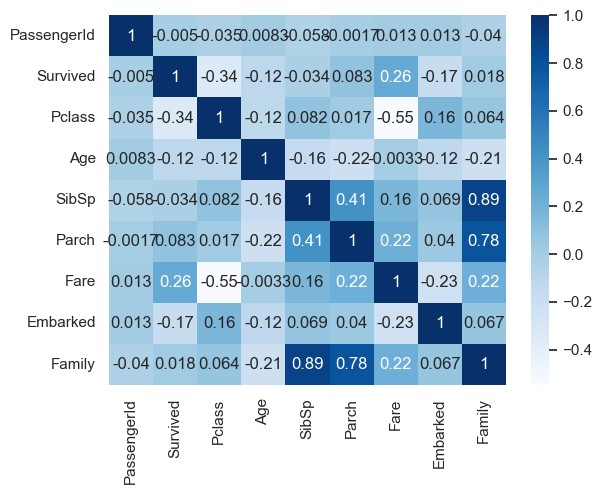

In [38]:
cont_val = df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family']]
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.heatmap(cont_val.corr(),cmap='Blues',annot=True)


Text(0.5, 1.0, "Distribution of passenger's classes")

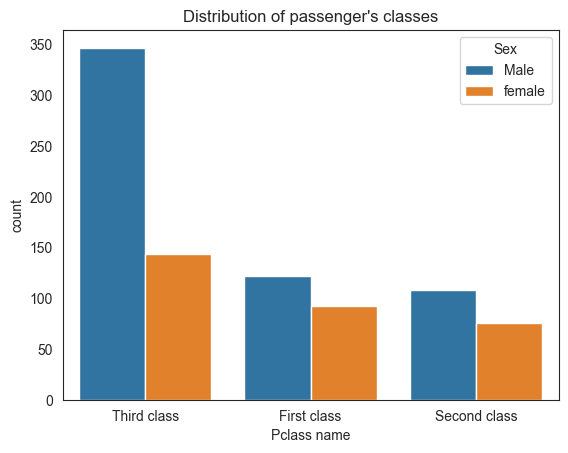

In [25]:
sns.countplot(data=df,x="Pclass name",hue='Sex')
plt.title("Distribution of passenger's classes")

Text(0.5, 1.0, 'Distribution by age')

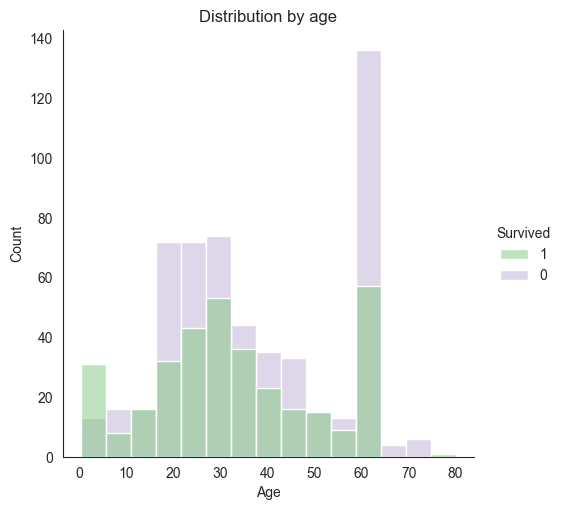

In [26]:
sns.set_style('white')
sns.displot(data=df,x="Age",bins=15,hue='Survived',palette='Accent',hue_order=[1,0])
plt.title("Distribution by age")

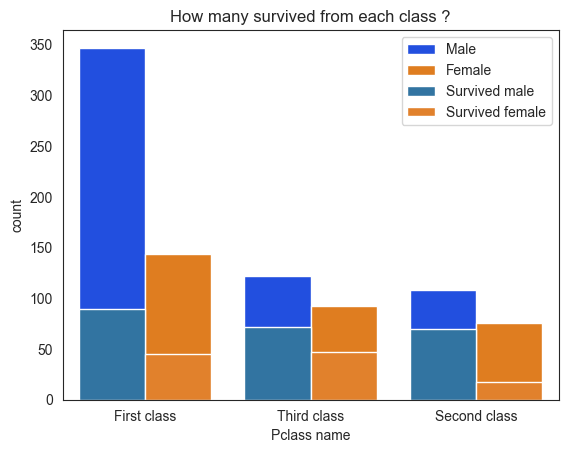

In [27]:
survived=df[df["Survived"]==1]
ax = plt.subplots()
ax=sns.countplot(data=df,x="Pclass name",hue='Sex',palette="bright")
ax=sns.countplot(data=survived,x="Pclass name",hue='Sex')
plt.title('How many survived from each class ?')
plt.legend(labels=['Male', 'Female','Survived male', 'Survived female']);

Text(0.5, 1.0, "Distribution of passenger's family members")

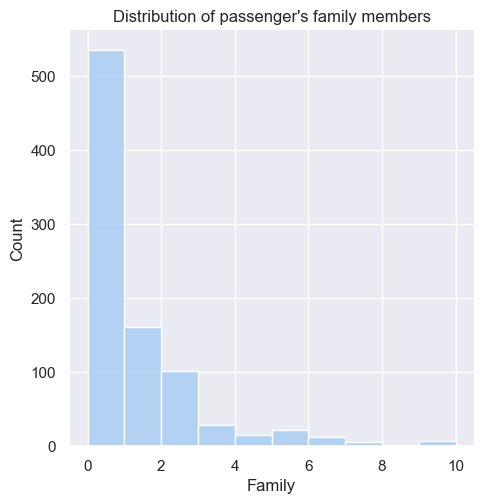

In [39]:
sns.displot(data=df,x='Family',bins=10)
plt.title("Distribution of passenger's family members")